# Y2
## Javier Jorganes Villanueva 15.11.2023

## Valmistus
Minulla oli datan 3.lla erilaisella tiedostolla (acc,gyro ja magn). Yhdistin ne kolme yhteen ja otin ylimääräiset aikaleimat pois.
```python
combined_df = pd.read_csv('combined_csv.csv')

combined_df.drop(combined_df.columns[[4, 8]], axis=1, inplace=True)

combined_df.to_csv('combined_v1.csv', index=False)

v1_df = pd.read_csv('combined_v1.csv')
v1_df.rename(columns={'x':'x_acc','y':'y_acc','z':'z_acc','x.1':'x_gyro','y.1':'y_gyro','z.1':'z_gyro','x.2':'x_magn','y.2':'y_magn','z.2':'z_magn'},inplace=True)
v1_df.to_csv('v2.csv', index=False)

```

## T. 1
1. Lue yhden tekemänne kyykkytestin mittaustulokset Jupyter Notebookiin. Parsi data oikeaan muotoon, kuten edellisessä tehtävässä. Käytä parsimiseen GitLabista löytyvää esimerkkikoodia: sakarilukkarinen / hyte-projekti-1 · GitLab (metropolia.fi). Tallenna parsittu data uuteen .csv-tiedostoon.

Meidän data oli jo oikeassa muodossa joten ei tarvinnut parsata sitä.

2. Avaa parsittu data Jupyter Notebookissa.

`df = pd.read_csv('v2.csv')`

3. Tarkista, että data näkyy oikein, ja sisältää aikaleiman sekä 9 datasaraketta: 3 x kiihtyvyys, 3 x gyroskooppi ja 3 x magnetometri.

`print(df.head(10))`

4. Muunna aikaleimat sekunneiksi.

`df.index = df.index / 1000`

5. Tee aikaleimasarakkeesta indeksisarake.

`df.set_index('timestamp', inplace=True)`

6. Tarkista, että aikaleima näkyy nyt indeksisarakkeessa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('v2.csv')
#print(df.head(10))
df.set_index('timestamp', inplace=True)
df.index = df.index / 1000
#print(df.head(10))

## T. 2
1. Erottele kiihtyvyysdata, gyroskooppidata ja magnetometridata omiin DataFrameihin.

Tässä kohdassa teen käänteisprosessi edellisesta kohdasta missä yhdistin kaikki yhteen tiedostoon.

2. Muunna DataFramet kolmeksi numpy arrayksi.

```python
acc_numpy_array = df_acc.to_numpy()
gyro_numpy_array = df_gyro.to_numpy()
magn_numpy_array = df_magn.to_numpy()
```

3. Piirrä kiihtyvyys-, gyro- ja magnetometrimittauksien kuvaajat. Piirrä kolme kuvaa, yksi kullekin mittausdatalle. Piirrä jokaiseen kuvaan erillinen kuva x-, y-, ja z-akselille. Aseta akselien kuvaajat päällekkäin.

Tätä varten tein oman funktion joka ottaa datan listasta (ei dataframista). Huomasin että piirtää kuvaajat df.sta olisi helpompi koska noissa on timestamp indeksina. Kun siirrettään datan listaan, timestamp hävisi koska se on indeksi ja indeksit eivät siirtyy listaan. 
Joka tapauksessa funktiossa sain sample-ajat lisätty seuraavalla tavalla:

```python
sample_interval_ms = 20
time_ms = np.arange(data.shape[0]) * sample_interval_ms
time_s = time_ms / 1000
```

4. Tarkista, että kuvakoko on sopiva. Muokkaa koodia tarvittaessa suurentaaksesi kuvaa, jotta kuvaajat ovat selkeitä.

Käytin tätä varten "figsize" parametria funktion sisällä. Näin funktio antaa sopiva koko kaikkille kuvaajille.

`plt.figure(figsize=(10, 6))`

5. Muokkaa kuvien oletuskokoa muuttamalla rcParams.figsize-parametria.

Koska  kuvaajien koko on minun mielestä sopiva, en ole käyttänyt "rcParams.figsize-parametria".


In [3]:
df_acc = df[['x_acc','y_acc','z_acc']]
df_gyro = df[['x_gyro','y_gyro','z_gyro']]
df_magn = df[['x_magn','y_magn','z_magn']]
#print(df_acc.head(10))
#print(df_acc.tail(10))
#print(df_gyro.head(10))
#print(df_magn.head(10))

acc_numpy_array = df_acc.to_numpy()
gyro_numpy_array = df_gyro.to_numpy()
magn_numpy_array = df_magn.to_numpy()
#print(magn_numpy_array)

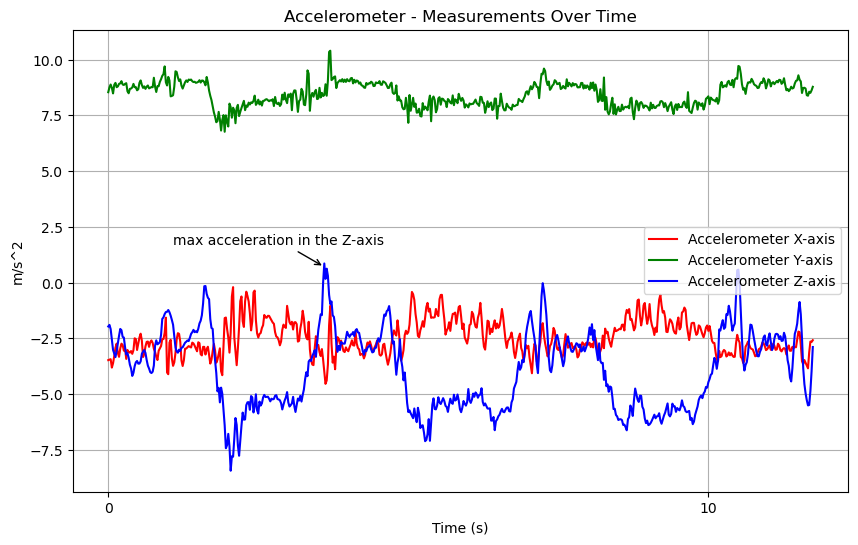

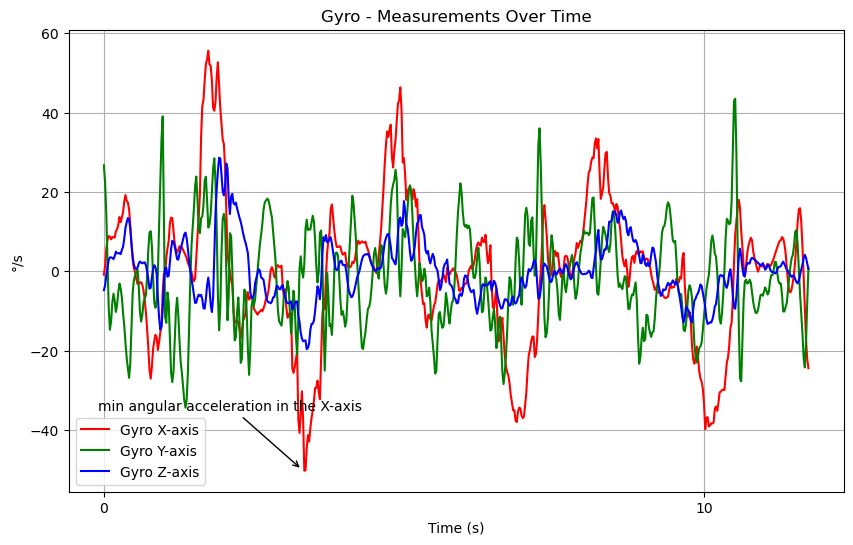

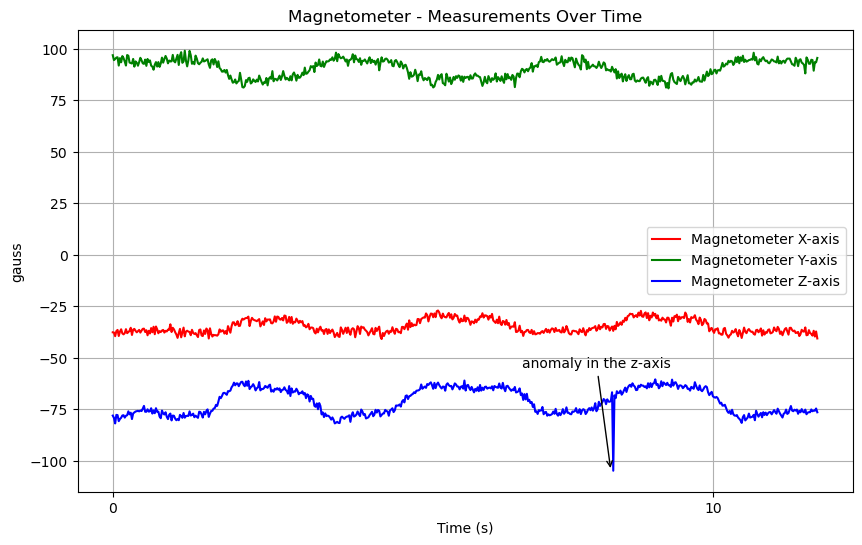

In [4]:
# Function to plot the data from the array

def plot_sensor_data(data, sensor_name, units, save_filename=None):
    sample_interval_ms = 20
    time_ms = np.arange(data.shape[0]) * sample_interval_ms
    time_s = time_ms / 1000

    fig, ax = plt.subplots(figsize=(10, 6)) # plt.subplots() returns a figure object and axes object (fig,ax).
    ax.plot(time_s, data[:, 0], label=f'{sensor_name} X-axis', color='r')
    ax.plot(time_s, data[:, 1], label=f'{sensor_name} Y-axis', color='g')
    ax.plot(time_s, data[:, 2], label=f'{sensor_name} Z-axis', color='b')
    # "fig" is the figure object, which can be thought of as the overall window or page on which everything is drawn
    # "ax" is the axes object, which represents the plot space (or spaces, if there are multiple subplots) within the figure. It's where you plot your data, set labels, titles, etc.
    
    # Sets x-axis ticks
    max_time = time_s[-1]  # Gets the maximum time
    ax.set_xticks(np.arange(0, max_time, 10))  # Sets ticks every 10 seconds
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(units)
    ax.set_title(f'{sensor_name} - Measurements Over Time')
    ax.legend()
    ax.grid(True)
    
    # Saves the plot if a filename is provided
    if save_filename:
        fig.savefig(save_filename, format='png')
    
    return fig, ax

# Plot accelerometer data
fig, ax = plot_sensor_data(acc_numpy_array, 'Accelerometer', 'm/s^2')

# Add an annotation
annotation_text = "max acceleration in the Z-axis"
annotation_x = 3.6  # Replace with the x-coordinate for annotation
annotation_y = 0.7  # Replace with the y-coordinate for annotation
ax.annotate(annotation_text, xy=(annotation_x, annotation_y), xytext=(annotation_x + 1, annotation_y + 1),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='right')

fig.savefig('acc_plot_annotated.png', format='png')

# Plot gyro data
fig, ax = plot_sensor_data(gyro_numpy_array, 'Gyro', '°/s')

# Add an annotation
annotation_text = "min angular acceleration in the X-axis"
annotation_x = 3.3  # Replace with the x-coordinate for annotation
annotation_y = -50  # Replace with the y-coordinate for annotation
ax.annotate(annotation_text, xy=(annotation_x, annotation_y), xytext=(annotation_x + 1, annotation_y + 15),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='right')

fig.savefig('gyro_plot_annotated.png', format='png')

# Plot magn data
fig, ax = plot_sensor_data(magn_numpy_array, 'Magnetometer', 'gauss')

# Add an annotation
annotation_text = "anomaly in the z-axis"
annotation_x = 8.3  # Replace with the x-coordinate for annotation
annotation_y = -105  # Replace with the y-coordinate for annotation
ax.annotate(annotation_text, xy=(annotation_x, annotation_y), xytext=(annotation_x + 1, annotation_y + 50),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='right')

fig.savefig('magn_plot_annotated.png', format='png')

plt.show()  # Show the plot with the annotation

## T. 3
Muokkaa aiemmin tekemiäsi kuvaajia.
1. Aseta kuville sekä akselien kuvaajille omat otsikot.

"plot_sensor_data" funktio tekee tämän automaattisesti jokaiselle kuvaajalle.

`plt.title(f'{sensor_name} - Measurements Over Time')`

2. Aseta kuvaajien x- ja y-akseleille otsikot (label).

``` python
plt.xlabel('Time (s)')
plt.ylabel(units)
```
    
3. Vaihda kuvaajien värit muiksi kuin oletusväreiksi.

Tämän toteutus näkee alla. "color='r'"

`plt.plot(time_s, data[:, 0], label=f'{sensor_name} X-axis', color='r')`

4. Lisää datoille selitteet, ja laita selitteet näkymään kuvassa.

Sen jälkeen kun funktio on kutsuttu, lisään selitteet.

```python
fig, ax = plot_sensor_data(magn_numpy_array, 'Magnetometer', 'gauss')

annotation_text = "anomaly in the z-axis"
annotation_x = 8.3  # Replace with the x-coordinate for annotation
annotation_y = -105  # Replace with the y-coordinate for annotation
ax.annotate(annotation_text, xy=(annotation_x, annotation_y), xytext=(annotation_x + 1, annotation_y + 50),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='right')

plt.show()

```

5. Muokkaa kuvaajien x-akselin tickeja niin, että siinä näkyy sekunnit 10 sekunnin välein.

Vaikka visuaalisesti tämä ei ole paras vaihtoehto (koko testi on 12 sek.), tämäkin toteutettu seuraavalla tavalla:

```python
    max_time = time_s[-1]
    ax.set_xticks(np.arange(0, max_time, 10))
```


6. Tallenna tekemäsi kolme kuvaa png-muodossa omalle koneelle. Anna kuville kuvaavat nimet

Tätä varten lisäsin pikkun osan funktion sisälle joka tallentaa png tiedoston kuvaajasta vain siinä tapauksessa että annettaan sen parametrin funktion kutsutaessa. Kommentoin sen pois koska haluan tallentaa kuvan selitteen lisämisen jälkeen.

```python
    if save_filename:
        fig.savefig(save_filename, format='png')
    
```

Siinä tapauksessa että haluaisin tallentaa kuvan selitteen lisäämisen jälkeen, koodin pitäisi näyttää tältä: 

```python
fig, ax = plot_sensor_data(acc_numpy_array, 'Accelerometer', 'm/s^2')

annotation_text = "max acceleration in the Z-axis"
annotation_x = 3.6  # Replace with the x-coordinate for annotation
annotation_y = 0.7  # Replace with the y-coordinate for annotation
ax.annotate(annotation_text, xy=(annotation_x, annotation_y), xytext=(annotation_x + 1, annotation_y + 1),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='right')

fig.savefig('acc_plot_annotated.png', format='png')

plt.show()
```